# DESAFIO


In [2]:
# Montagem do drive para acessar dentro do colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Ler o arquivo CSV e carregar em um dataframe
# Precisa passar o caminho corretamente
licitacao_2016 = pd.read_csv('../2016/licitacao.csv')
licitacao_2017 = pd.read_csv('../2017/licitacao.csv')
licitacao_2018 = pd.read_csv('../2018/licitacao.csv')
licitacao_2019 = pd.read_csv('../2019/licitacao.csv')

item_2016 = pd.read_csv('../2016/item.csv')
item_2017 = pd.read_csv('../2017/item.csv')
item_2018 = pd.read_csv('../2018/item.csv')
item_2019 = pd.read_csv('../2019/item.csv')



<ipython-input-4-72a8a930416f>:4: DtypeWarning: Columns (52,54) have mixed types. Specify dtype option on import or set low_memory=False.
  licitacao_2017 = pd.read_csv('/content/drive/MyDrive/desafio_data_science/base Riogrande do sul/2017/licitacao.csv')
<ipython-input-4-72a8a930416f>:5: DtypeWarning: Columns (52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  licitacao_2018 = pd.read_csv('/content/drive/MyDrive/desafio_data_science/base Riogrande do sul/2018/licitacao.csv')
<ipython-input-4-72a8a930416f>:6: DtypeWarning: Columns (53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  licitacao_2019 = pd.read_csv('/content/drive/MyDrive/desafio_data_science/base Riogrande do sul/2019/licitacao.csv')
<ipython-input-4-72a8a930416f>:8: DtypeWarning: Columns (19,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  item_2016 = pd.read_csv('/content/drive/MyDrive/desafio_data_science/base Riogra

In [ ]:
pd.set_option('display.max_columns', None)
licitacao_2016.head(10)

In [ ]:
item_2016.head(10)

In [ ]:
item_2016.info()

In [ ]:
licitacao_2016.info()

In [5]:
df_licitacao = pd.concat([licitacao_2016, licitacao_2017, licitacao_2018, licitacao_2019])
df_item =  pd.concat([item_2016, item_2017, item_2018, item_2019])

Regressão Linear. O intercepto está muito baixo, recomendo verificar outro campo da base de dados ou até mesmo os dados.

Coeficientes: [-1.43296205e+02  1.22842027e+07]
Intercepto: -24766752210.799862
R²: 6.59943158820564e-06


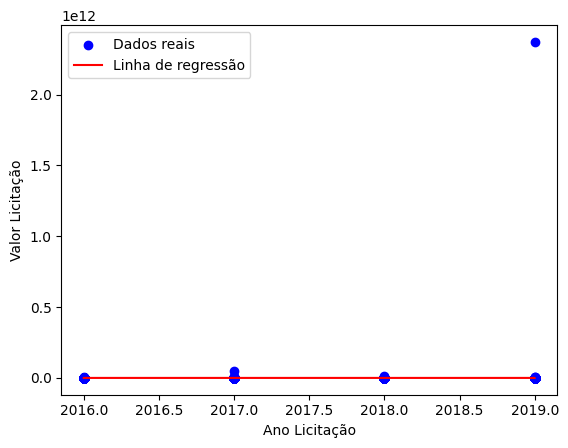

In [6]:
colunas = ['CD_ORGAO', 'ANO_LICITACAO', 'VL_LICITACAO']

df_regressao = df_licitacao.copy()

# Filtrar o dataframe apenas com as colunas selecionadas
dados_regressao = df_regressao[colunas].dropna()  # Remover linhas com valores ausentes

# Separar os dados de entrada (X) e de saída (y)
X = dados_regressao[['CD_ORGAO', 'ANO_LICITACAO']]  # Variáveis independentes
y = dados_regressao['VL_LICITACAO']  # Variável dependente

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo utilizando os dados
model.fit(X, y)

# Realizar previsões com base nos dados utilizados no treinamento
y_pred = model.predict(X)

# Exibir os resultados
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('R²:', model.score(X, y))

# Plotar os dados e a linha de regressão
plt.scatter(X['ANO_LICITACAO'], y, color='blue', label='Dados reais')
plt.plot(X['ANO_LICITACAO'], y_pred, color='red', label='Linha de regressão')
plt.xlabel('Ano Licitação')
plt.ylabel('Valor Licitação')
plt.legend()
plt.show()

In [8]:
# Cópia do dataframe
df_agrupamento = df_licitacao.copy()


Agrupamento realizado com o KNN, foi separado manualmente em 5 cluster, o correto seria fazer a verificação do "cotovelo" (método elbow ou coeficiente da silhueta média) para a definir de forma mais adequada a quantidade de cluster

In [7]:
# Selecionar colunas relevantes para o agrupamento
colunas = ['ANO_LICITACAO', 'VL_LICITACAO']
df_agrupamento = df_licitacao.copy()

# Retirado dados ausentes
df_agrupamento = df_agrupamento[colunas].dropna()

# Converter colunas numéricas para float
df_agrupamento[colunas] = df_agrupamento[colunas].astype(float)

# Criar o objeto scaler
scaler = MinMaxScaler()

# Aplicar a transformação nos dados
df_normalizado = scaler.fit_transform(df_agrupamento)

# Aplicar o algoritmo de agrupamento (K-means)
k = 5  # número de clusters desejado
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(df_normalizado)

# Inverter a escala dos dados para obter os valores originais
df_original = scaler.inverse_transform(df_normalizado)

# Criar um novo dataframe com os valores originais e o cluster atribuído
df_final = pd.DataFrame(df_original, columns=colunas)
df_final['ANO_LICITACAO'] = df_final['ANO_LICITACAO'].astype(int)

# Adicionar a coluna de cluster ao dataframe original
df_final['CLUSTER'] = clusters

# Imprimir 10 linhas do dataframe
df_final.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ANO_LICITACAO,VL_LICITACAO,CLUSTER
0,2016,7000.00,3
1,2016,11216.50,3
2,2016,59810.60,3
3,2016,3835.00,3
4,2016,251.70,3
5,2016,31384.90,3
6,2016,22841.67,3
7,2016,375.12,3
8,2016,92007.88,3
9,2016,34639.81,3


Correlação dos dados, só para entender melhor as váriaveis da base

In [9]:
df_item.corr()

<ipython-input-9-2719784eead2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_item.corr()


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,NR_LOTE,NR_ITEM,VL_UNITARIO_ESTIMADO,VL_TOTAL_ESTIMADO,PC_BDI_ESTIMADO,PC_ENCARGOS_SOCIAIS_ESTIMADO,VL_UNITARIO_HOMOLOGADO,PC_BDI_HOMOLOGADO,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
CD_ORGAO,1.000000,-4.221950e-05,-0.009753,-0.011658,-0.001530,-0.002397,-2.585523e-04,-0.025074,-0.040506,-0.004516,-0.093708,-0.180526,0.110343,0.036742,0.036709,0.326497
NR_LICITACAO,-0.000042,1.000000e+00,-0.000580,-0.000042,-0.000007,0.000003,-6.039457e-07,-0.000425,-0.000183,0.000080,-0.000388,-0.000406,-0.002700,-0.005028,-0.015564,-0.044615
ANO_LICITACAO,-0.009753,-5.803963e-04,1.000000,0.034021,-0.003191,0.001064,8.614238e-04,0.007276,0.019256,0.000516,0.021470,0.042774,0.002638,0.015918,0.053681,0.167381
NR_LOTE,-0.011658,-4.167423e-05,0.034021,1.000000,-0.000114,-0.000044,-3.724319e-05,-0.009885,-0.004207,0.000047,0.002841,0.003481,0.020347,0.000389,NaN,NaN
NR_ITEM,-0.001530,-7.435038e-06,-0.003191,-0.000114,1.000000,0.000002,-5.801830e-06,0.007680,0.002658,0.000265,0.010005,0.012689,0.093155,-0.014704,-0.035298,0.260253
VL_UNITARIO_ESTIMADO,-0.002397,2.893892e-06,0.001064,-0.000044,0.000002,1.000000,1.588532e-03,0.005528,0.003204,0.829318,0.007753,0.011312,-0.025441,-0.011276,0.011365,-0.101274
VL_TOTAL_ESTIMADO,-0.000259,-6.039457e-07,0.000861,-0.000037,-0.000006,0.001589,1.000000e+00,0.001876,0.000405,0.000285,0.002274,0.001425,-0.003951,0.003543,0.069070,-0.099420
PC_BDI_ESTIMADO,-0.025074,-4.251635e-04,0.007276,-0.009885,0.007680,0.005528,1.875878e-03,1.000000,0.532255,0.014407,0.645877,0.605489,-0.415290,-0.376800,0.317361,NaN
PC_ENCARGOS_SOCIAIS_ESTIMADO,-0.040506,-1.825834e-04,0.019256,-0.004207,0.002658,0.003204,4.045217e-04,0.532255,1.000000,0.006606,0.295425,0.379583,-0.204458,-0.192359,0.065880,NaN
VL_UNITARIO_HOMOLOGADO,-0.004516,8.031540e-05,0.000516,0.000047,0.000265,0.829318,2.848822e-04,0.014407,0.006606,1.000000,0.014097,0.020174,-0.005902,-0.000443,-0.032429,-0.103751


In [10]:
df_licitacao.corr()

<ipython-input-10-c90d55578164>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_licitacao.corr()


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,NR_COMISSAO,ANO_COMISSAO,ANO_PROCESSO,ANO_LICITACAO_ORIGINAL,PC_TAXA_RISCO,CNPJ_ORGAO_GERENCIADOR,NR_ARTIGO,VL_LICITACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
CD_ORGAO,1.000000,0.000094,-0.036650,-0.008404,0.018966,-0.024054,-0.000887,0.002572,-0.363807,-0.014109,-0.000581,0.057396,-0.112397
NR_LICITACAO,0.000094,1.000000,-0.002354,-0.000207,-0.000910,0.000293,0.022238,-0.000255,0.005105,0.000385,-0.000007,-0.013865,-0.031151
ANO_LICITACAO,-0.036650,-0.002354,1.000000,-0.000438,0.135078,-0.041605,0.070888,0.004112,-0.009870,-0.018149,0.002521,0.128068,0.027192
NR_COMISSAO,-0.008404,-0.000207,-0.000438,1.000000,-0.000490,0.008633,0.224991,-0.001091,-0.127663,0.060248,-0.000233,-0.015393,-0.070619
ANO_COMISSAO,0.018966,-0.000910,0.135078,-0.000490,1.000000,-0.003751,0.037710,0.003981,0.037955,-0.013222,0.000810,0.090779,0.035787
ANO_PROCESSO,-0.024054,0.000293,-0.041605,0.008633,-0.003751,1.000000,-0.068078,0.003820,0.045027,-0.000785,0.000232,0.129719,0.058885
ANO_LICITACAO_ORIGINAL,-0.000887,0.022238,0.070888,0.224991,0.037710,-0.068078,1.000000,NaN,0.018988,-0.011707,0.004267,NaN,NaN
PC_TAXA_RISCO,0.002572,-0.000255,0.004112,-0.001091,0.003981,0.003820,NaN,1.000000,NaN,NaN,0.000033,NaN,NaN
CNPJ_ORGAO_GERENCIADOR,-0.363807,0.005105,-0.009870,-0.127663,0.037955,0.045027,0.018988,NaN,1.000000,0.764630,0.010288,-0.999098,NaN
NR_ARTIGO,-0.014109,0.000385,-0.018149,0.060248,-0.013222,-0.000785,-0.011707,NaN,0.764630,1.000000,-0.001390,NaN,NaN


Respondendo as perguntas.

Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 40179 exemplos
- A presente licitação tem por objeto a seleção de proposta, visando à aquisição de Equipamentos de Informática.
- Aquisição de material hospitalar
- Fornecimento de materiais de expediente.
- Aquisição de materiais de higiene e limpeza para limpeza e manutenção das escolas Municipais, Centro Administrativo I e II, Conselho Tutelar, Sec. da Saúde, Cras e Sec. Obras e Viação.
- Aquisição de grama 

Cluster 1: 51207 exemplos
- Contratação de empresa especializada para realização de Concurso Público.
- Contratação de empresa para elaboração de projetos de licenciamento ambiental de regularização e de registro de extração, em relação à pedreira de basalto, localizada em Vasco Bandeira.
- CONTRATAÇÃO DE SERVIÇO DE DISTRIBUIÇÃO DE JORNAL DE PRESTAÇÃO DE CONTAS DO MUNICÍPIO DE CAMPO BOM.
- CONTRATAÇÃO DE EMPRESA PARA PRESTAÇÃO DE SERVIÇOS DE TRANSPORTE ESCOLAR
- Contratação de pessoa jurídica para a prestação de serviços de Implantação e Gestão Integrada, Manejo de R

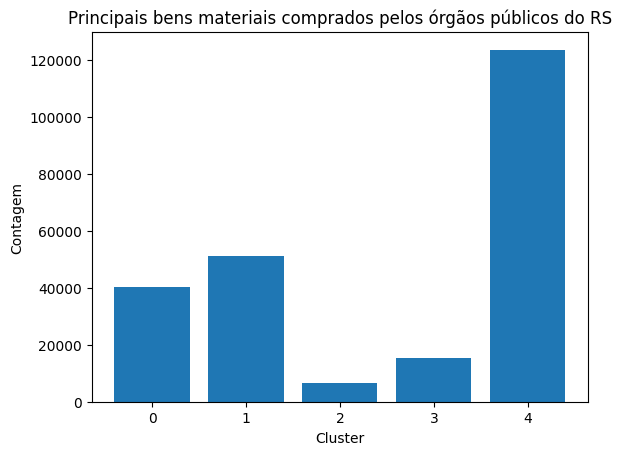

In [11]:

df = df_licitacao.copy()

# Pré-processamento dos dados
df = df[['DS_OBJETO']]
df.dropna(inplace=True)

# Definição da lista de stopwords em português
stopwords = ['a', 'e', 'i', 'o', 'u', 'de', 'do', 'da', 'dos', 'das']

# Vetorização dos dados de texto
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df['DS_OBJETO'])

# Aplicação do algoritmo de agrupamento K-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Adicionar o cluster ao dataframe
df['Cluster'] = kmeans.labels_

# Contagem dos itens em cada cluster
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

# Plotagem do gráfico de barras
plt.bar(clusters, counts)
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Principais bens materiais comprados pelos órgãos públicos do RS')

# Exibir os principais bens materiais em cada cluster
for cluster_id, count in zip(clusters, counts):
    print(f"Cluster {cluster_id}: {count} exemplos")
    cluster_samples = df[kmeans.labels_ == cluster_id].sample(min(count, 5))
    for sample in cluster_samples['DS_OBJETO']:
        print(f"- {sample}")
    print()

plt.show()


In [12]:
df.head(10)

,DS_OBJETO,Cluster
0,Contratação de arbitragem dos jogos do 2º camp...,4
1,Aquisição de merenda escolar,2
2,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,4
3,Aquisição de materiais de limpeza para as dive...,0
4,CONTRATAÇÃO DE EMPRESA PARA FORNECIMENTO E INS...,1
5,Aquisição de tubos de concreto,0
6,Aquisição de tubos de concreto,0
7,Aquisição de módulos de comunicação de dados ...,4
8,Aquisição de medicamentos,0
9,"Aquisição de materiais hidráulicos em PVC, PEA...",4


Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul, por ano?

<ipython-input-13-6a03d428d0d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-6a03d428d0d5>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_counts = cluster_counts.append({'Ano': year, 'Cluster': cluster_id, 'Contagem': count}, ignore_index=True)
<ipython-input-13-6a03d428d0d5>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_counts = c

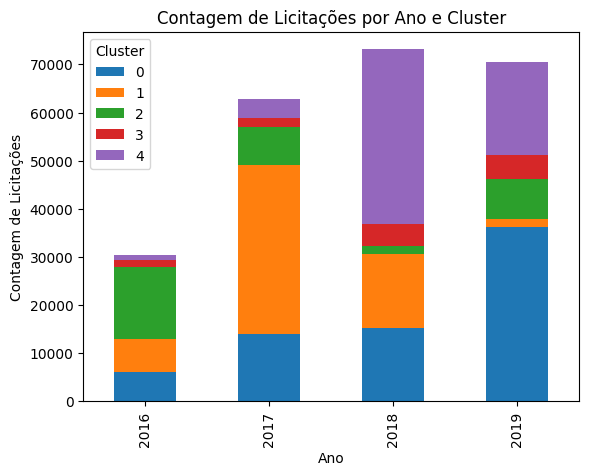

In [13]:
df = df_licitacao.copy()


# Pré-processamento dos dados
df = df_licitacao[['ANO_LICITACAO', 'DS_OBJETO']]
df.dropna(inplace=True)

# Definição da lista de stopwords em português
stopwords = ['a', 'e', 'i', 'o', 'u', 'de', 'do', 'da', 'dos', 'das']

# Vetorização dos dados de texto
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df['DS_OBJETO'])

# Aplicação do algoritmo de agrupamento K-means para cada ano
k = 5
cluster_results = {}
for year in df['ANO_LICITACAO'].unique():
    X_year = X[df['ANO_LICITACAO'] == year]
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_year)
    cluster_results[year] = kmeans

# Contagem de licitações por ano e por cluster
cluster_counts = pd.DataFrame(columns=['Ano', 'Cluster', 'Contagem'])
for year, kmeans in cluster_results.items():
    labels = kmeans.labels_
    counts = np.bincount(labels)
    for cluster_id, count in enumerate(counts):
        cluster_counts = cluster_counts.append({'Ano': year, 'Cluster': cluster_id, 'Contagem': count}, ignore_index=True)

# Plotar gráfico de barras
pivot_table = cluster_counts.pivot(index='Ano', columns='Cluster', values='Contagem')
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Ano')
plt.ylabel('Contagem de Licitações')
plt.title('Contagem de Licitações por Ano e Cluster')

plt.show()

É possível identificar algum padrão nas compras?

In [14]:
"""
# Dividir df_item em subconjuntos menores
chunk_size = 10000
chunks = [df_item[i:i+chunk_size] for i in range(0, len(df_item), chunk_size)]

# Realizar merge por partes
merged_df = pd.DataFrame()
for chunk in chunks:
    merged_chunk = chunk.merge(df_licitacao, on=["CD_ORGAO", "NR_LICITACAO", "ANO_LICITACAO"], how="inner")
    merged_df = pd.concat([merged_df, merged_chunk], ignore_index=True)
"""

df_item_sorted = df_item.sort_values(by=["CD_ORGAO", "NR_LICITACAO", "ANO_LICITACAO"])
df_licitacao_sorted = df_licitacao.sort_values(by=["CD_ORGAO", "NR_LICITACAO", "ANO_LICITACAO"])

# Corte do dataframe em quantidade de linhas para melhorar o desenpenho quando executar o algoritmo.
# Com o pandas a estouro de memória é recomendado utilizar o PySpark por exemplo.
df_item_subset = df_item_sorted[:30000]
df_licitacao_subset = df_licitacao_sorted[:30000]

merged_df = df_item_subset.merge(df_licitacao_subset, on=["CD_ORGAO", "NR_LICITACAO", "ANO_LICITACAO"], how="inner")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


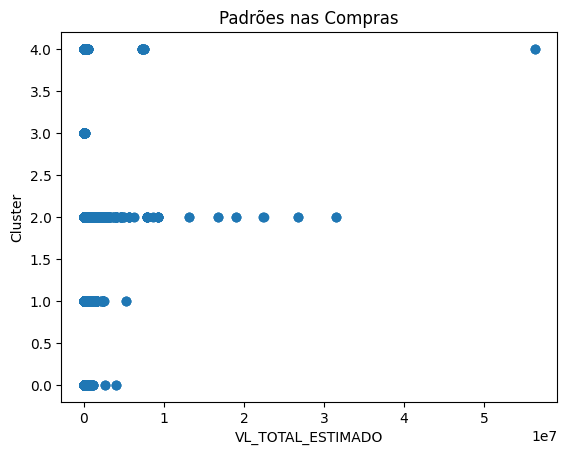

In [15]:

# Pré-processamento dos dados
df_processed = merged_df[["DS_ITEM", "VL_TOTAL_ESTIMADO"]].copy()
df_processed["DS_ITEM"] = df_processed["DS_ITEM"].fillna("")  # Trata valores ausentes
df_processed["VL_TOTAL_ESTIMADO"] = df_processed["VL_TOTAL_ESTIMADO"].fillna(0)  # Trata valores ausentes

# Codificação da variável categórica "DS_ITEM"
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_processed["DS_ITEM"])

# Normalização dos dados numéricos
scaler = MinMaxScaler()
df_processed["VL_TOTAL_ESTIMADO"] = scaler.fit_transform(df_processed[["VL_TOTAL_ESTIMADO"]])

# Aplicação do algoritmo de clusterização K-means
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

df_processed["VL_TOTAL_ESTIMADO"] = scaler.inverse_transform(df_processed[["VL_TOTAL_ESTIMADO"]])

df_processed["Cluster"] = kmeans.labels_

plt.scatter(df_processed["VL_TOTAL_ESTIMADO"], df_processed["Cluster"])
plt.xlabel("VL_TOTAL_ESTIMADO")
plt.ylabel("Cluster")
plt.title("Padrões nas Compras")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        31
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00       208
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00      1258
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00      1082
          12       1.00      1.00      1.00     26921

    accuracy                           1.00     29903
   macro avg       0.92      0.92      0.92     29903
weighted avg       1.00      1.00      1.00     29903



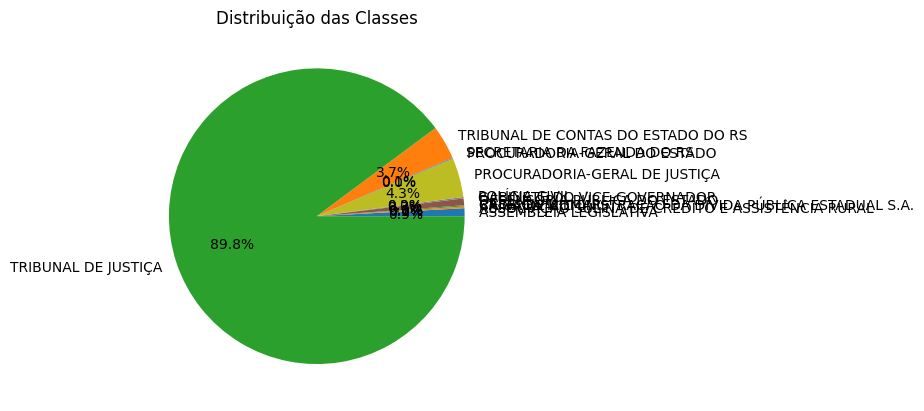

In [50]:
df_combined = merged_df.copy()

# Codificar as variáveis categóricas, pode se utilizar váriaveis dummy pelo pandas, get_dummy()
label_encoder = LabelEncoder()
df_combined['NM_ORGAO'] = label_encoder.fit_transform(df_combined['NM_ORGAO'])

# Dividir os dados em treinamento e teste
X = df_combined[['ANO_LICITACAO', 'CD_ORGAO']]
y = df_combined['NM_ORGAO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de classificação
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
report = classification_report(y_test, y_pred)
print(report)

# Plotar o gráfico de pizza
class_names = label_encoder.classes_
class_counts = df_combined['NM_ORGAO'].value_counts().sort_index()
class_counts_str = [str(count) for count in class_counts]
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
plt.title('Distribuição das Classes')
plt.show()


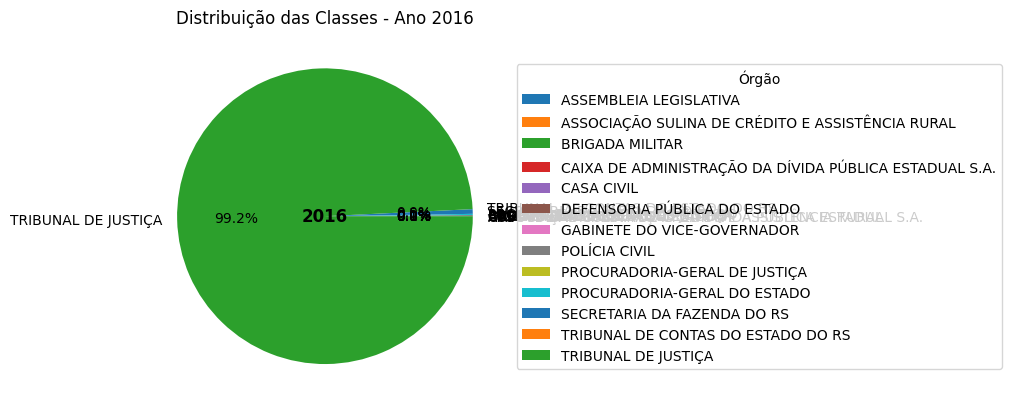

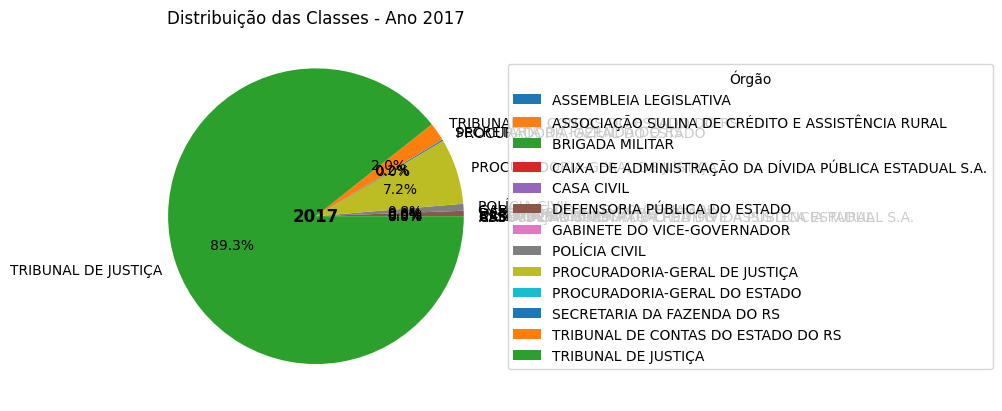

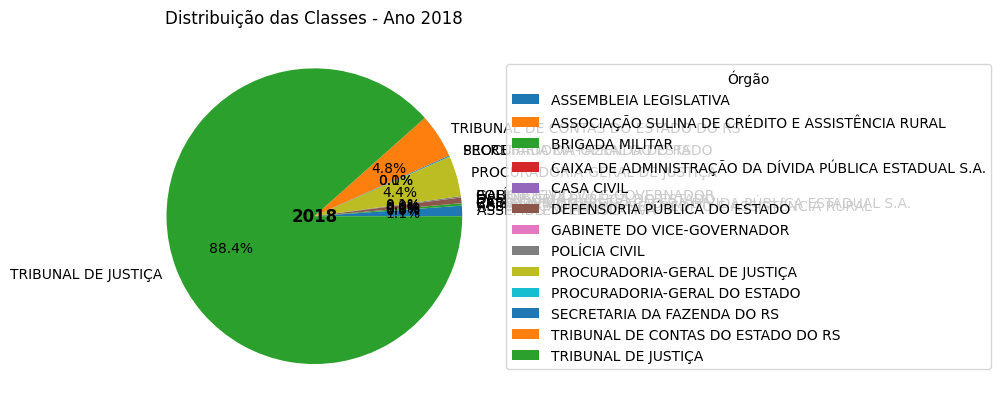

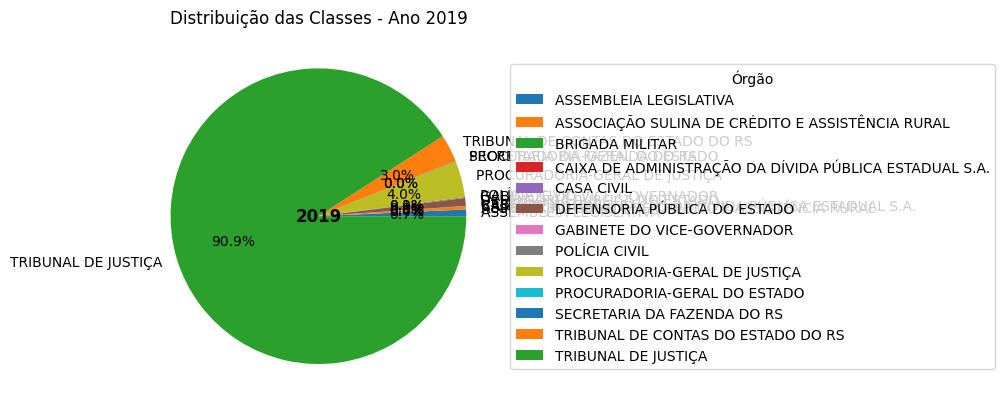

In [56]:
class_counts_by_year = df_combined.groupby(['ANO_LICITACAO', 'NM_ORGAO']).size().unstack(fill_value=0)

# Plotar os gráficos separados por ano
for year in class_counts_by_year.index:
    class_counts = class_counts_by_year.loc[year]
    class_names = label_encoder.classes_

    class_counts_str = [str(count) for count in class_counts]

    fig, ax = plt.subplots()
    ax.pie(class_counts, labels=class_names, autopct='%1.1f%%')
    ax.set_title(f'Distribuição das Classes - Ano {year}')
    ax.annotate(str(year), (0, 0), fontsize=12, fontweight='bold', va='center', ha='center')
    plt.legend(class_names, title='Órgão', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


Previsão da variável Valor Unitário Homologado para o ano de 2020, sem tratamento de Outlier.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No suppor

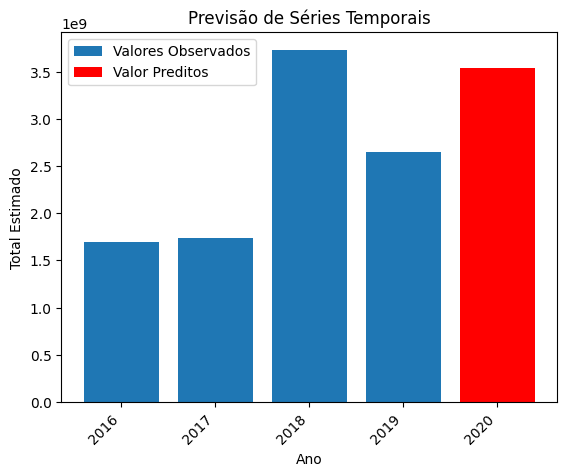

In [18]:
# Preparação dos dados
df_item_previsao = df_item[['ANO_LICITACAO', 'VL_UNITARIO_HOMOLOGADO']].copy()
df_agrupado = df_item_previsao.groupby('ANO_LICITACAO').sum()
serie_temporal = pd.Series(df_agrupado['VL_UNITARIO_HOMOLOGADO'])

# Aplicação do modelo ARIMA para a previsão
ordem_arima = (1, 1, 1)
modelo = ARIMA(serie_temporal, order=ordem_arima)
resultado = modelo.fit()

# Previsão para o próximo ano
predicao = resultado.predict(start=len(serie_temporal), end=len(serie_temporal), typ='levels')
ultimo_ano = serie_temporal.index[-1]

# Gráfico de barras com os valores observados
plt.bar(serie_temporal.index, serie_temporal, label='Valores Observados')

# Gráfico de barras com os valores preditos
plt.bar([ultimo_ano+1], predicao, color='red', label='Valor Preditos')

plt.xlabel('Ano')
plt.ylabel('Total Estimado')
plt.title('Previsão de Séries Temporais')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()
